In [1]:
import numpy as np
import csv
import pandas as pd

In [2]:
df = pd.read_csv("results/results_1119.tsv", sep="\t", header=None)
df.loc[(df[1] != "No Tag") & (df[1] != "Obscure") , :].to_csv("results/results_1119_rem.tsv", sep="\t", header=False)

In [3]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

all_data = pd.read_csv("data/Listing_Titles.tsv", sep="\t", dtype=str, keep_default_na=False, na_values=[""], quoting=csv.QUOTE_NONE)

In [4]:
train_df = pd.read_csv("data/Train_Tagged_Titles.tsv", sep="\t", dtype=str, keep_default_na=False, na_values=[""], quoting=csv.QUOTE_NONE)

In [5]:
train_df["Record Number"] = train_df["Record Number"].astype(int)

In [6]:
train_df

,Record Number,Title,Token,Tag
0,1,Supreme Nike SB Dunk High By any Means Red US1...,Supreme,Modell
1,1,Supreme Nike SB Dunk High By any Means Red US1...,Nike,Marke
2,1,Supreme Nike SB Dunk High By any Means Red US1...,SB,Produktlinie
3,1,Supreme Nike SB Dunk High By any Means Red US1...,Dunk,NaN
4,1,Supreme Nike SB Dunk High By any Means Red US1...,High,Schuhschaft-Typ
...,...,...,...,...
55178,5000,Herren Trekking Schuhe Outdoor Sneaker Sportsc...,Sportschuhe,Produktart
55179,5000,Herren Trekking Schuhe Outdoor Sneaker Sportsc...,Wanderschuh,NaN
55180,5000,Herren Trekking Schuhe Outdoor Sneaker Sportsc...,Big,No Tag
55181,5000,Herren Trekking Schuhe Outdoor Sneaker Sportsc...,Size,No Tag


In [7]:
x = train_df.loc[train_df["Record Number"] == 1, :]

In [8]:
#all_data.head()

<h2>Preprocessing + EDA</h2>
<h3> Undertand the nature of the training data, counts of different tokens + tags </h3>

First, we need to build the multi-token entities from NaNs.

Example 1

In [9]:
train_out = train_df.copy()
train_out.Tag = train_out.Tag.ffill()

In [10]:
train_out.to_csv("train_data_ffilled.csv")

<h3> DEPRECATED </h3>

In [11]:
drop_i = []
df1 = x.assign(na = x.Tag.isna())
df1.Tag = df1.Tag.fillna(method="ffill")
for i in range(len(df1)):
    if df1.loc[i, :].na:
        df1.loc[i, "Token"] = df1.loc[i-1, "Token"] + " " + df1.loc[i, "Token"]
        drop_i.append(i-1)
    else:
        df1 = df1.drop(drop_i)
        drop_i = []
df1 = df1.drop(drop_i)
df1

/var/folders/g0/vly43npx24nf2s_dtjcp9lq80000gn/T/ipykernel_32724/2807138620.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1.Tag = df1.Tag.fillna(method="ffill")


,Record Number,Title,Token,Tag,na
0,1,Supreme Nike SB Dunk High By any Means Red US1...,Supreme,Modell,False
1,1,Supreme Nike SB Dunk High By any Means Red US1...,Nike,Marke,False
3,1,Supreme Nike SB Dunk High By any Means Red US1...,SB Dunk,Produktlinie,True
4,1,Supreme Nike SB Dunk High By any Means Red US1...,High,Schuhschaft-Typ,False
7,1,Supreme Nike SB Dunk High By any Means Red US1...,By any Means,Modell,True
8,1,Supreme Nike SB Dunk High By any Means Red US1...,Red,Farbe,False
9,1,Supreme Nike SB Dunk High By any Means Red US1...,US10,US-Schuhgröße,False
10,1,Supreme Nike SB Dunk High By any Means Red US1...,EU44,EU-Schuhgröße,False
11,1,Supreme Nike SB Dunk High By any Means Red US1...,Supreme,No Tag,False
12,1,Supreme Nike SB Dunk High By any Means Red US1...,Box,No Tag,False


In [12]:
df1.loc[df1.Tag != "No Tag", ["Record Number", "Tag", "Token"]].sort_values("Tag").reset_index(drop=True)

,Record Number,Tag,Token
0,1,Akzente,Logo
1,1,EU-Schuhgröße,EU44
2,1,Farbe,Red
3,1,Marke,Nike
4,1,Modell,Supreme
5,1,Modell,By any Means
6,1,Produktlinie,SB Dunk
7,1,Produktlinie,Air Force
8,1,Schuhschaft-Typ,High
9,1,US-Schuhgröße,US10


Repeat this for all the entries in train (inefficient)

In [13]:
drop_i = []
train_df1 = train_df.assign(na = train_df.Tag.isna())
train_df1.Tag = train_df1.Tag.fillna(method="ffill")
for i in range(len(train_df1)):
    if train_df1.loc[i, :].na:
        train_df1.loc[i, "Token"] = train_df1.loc[i-1, "Token"] + " " + train_df1.loc[i, "Token"]
        drop_i.append(i-1)
    else:
        train_df1 = train_df1.drop(drop_i)
        drop_i = []
train_df1 = train_df1.drop(drop_i)
train_df1

/var/folders/g0/vly43npx24nf2s_dtjcp9lq80000gn/T/ipykernel_32724/4164974811.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df1.Tag = train_df1.Tag.fillna(method="ffill")


,Record Number,Title,Token,Tag,na
0,1,Supreme Nike SB Dunk High By any Means Red US1...,Supreme,Modell,False
1,1,Supreme Nike SB Dunk High By any Means Red US1...,Nike,Marke,False
3,1,Supreme Nike SB Dunk High By any Means Red US1...,SB Dunk,Produktlinie,True
4,1,Supreme Nike SB Dunk High By any Means Red US1...,High,Schuhschaft-Typ,False
7,1,Supreme Nike SB Dunk High By any Means Red US1...,By any Means,Modell,True
...,...,...,...,...,...
55177,5000,Herren Trekking Schuhe Outdoor Sneaker Sportsc...,Sneaker,Stil,False
55179,5000,Herren Trekking Schuhe Outdoor Sneaker Sportsc...,Sportschuhe Wanderschuh,Produktart,True
55180,5000,Herren Trekking Schuhe Outdoor Sneaker Sportsc...,Big,No Tag,False
55181,5000,Herren Trekking Schuhe Outdoor Sneaker Sportsc...,Size,No Tag,False


In [14]:
# train_df1.to_csv("train_data_tokenized.csv")

In [15]:
train_ner = train_df1.loc[train_df1.Tag != "No Tag", ["Record Number", "Tag", "Token"]].sort_values("Tag").reset_index(drop=True)
train_ner

,Record Number,Tag,Token
0,1665,Abteilung,Damen
1,2391,Abteilung,Damen
2,2390,Abteilung,Unisex
3,1944,Abteilung,Mann Frau
4,3809,Abteilung,Damen
...,...,...,...
34660,717,Zwischensohlen-Typ,SOFT FOAM
34661,3672,Zwischensohlen-Typ,Croslite
34662,3242,Zwischensohlen-Typ,Foam
34663,599,Zwischensohlen-Typ,Cloudfoam


<h3>Basic count-based EDA</h3>

Tag Counts

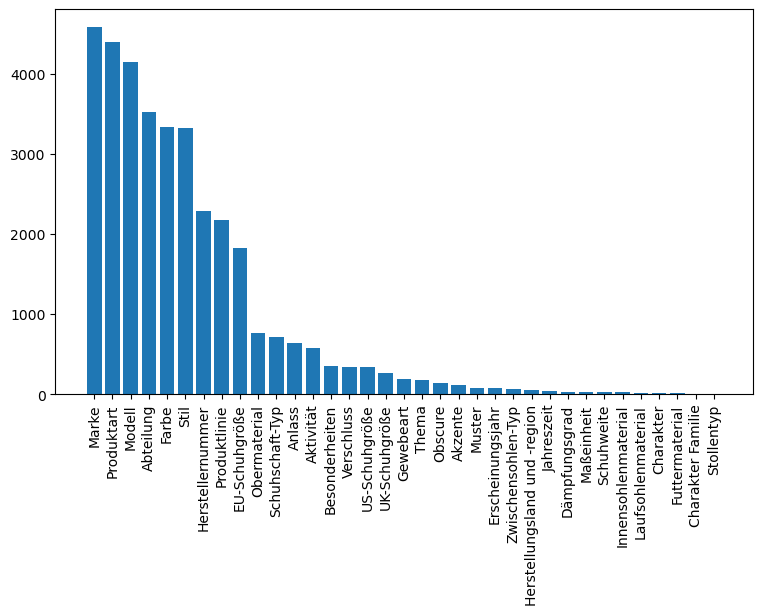

In [16]:
tag_counts = train_ner.groupby("Tag").count()["Token"].sort_values(ascending=False)

fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.bar(tag_counts.index, tag_counts.values.flatten(), )
plt.xticks(tag_counts.index, rotation=90)
plt.show()

In [17]:
tag_counts.sort_values(ascending=False).head(10) # top 10 tags

Tag
Marke               4576
Produktart          4390
Modell              4147
Abteilung           3518
Farbe               3335
Stil                3327
Herstellernummer    2281
Produktlinie        2172
EU-Schuhgröße       1829
Obermaterial         766
Name: Token, dtype: int64

Tag-Entity Pairs

In [18]:
by_tagtoken = train_ner.groupby(["Tag", "Token"]).count().sort_values("Record Number", ascending=False).reset_index()
by_tagtoken
# top 25 most common tag-entity pairs

,Tag,Token,Record Number
0,Stil,Sneaker,2550
1,Abteilung,Herren,1252
2,Produktart,Schuhe,1039
3,Abteilung,Damen,962
4,Marke,Nike,605
...,...,...,...
9996,Verschluss,Schuren,1
9997,Verschluss,Slide,1
9998,Abteilung,DAMEN HERREN UNISEX,1
9999,Zwischensohlen-Typ,memory foam,1


In [19]:
len(pd.unique(by_tagtoken.Token)) #Notice that this is NOT equal to most common tokens
# a token can be attributed to a different tag

9864

In [20]:
ent25 = by_tagtoken.head(25)
ent25

,Tag,Token,Record Number
0,Stil,Sneaker,2550
1,Abteilung,Herren,1252
2,Produktart,Schuhe,1039
3,Abteilung,Damen,962
4,Marke,Nike,605
5,Stil,Sneakers,441
6,Produktart,Turnschuhe,416
7,Marke,Adidas,405
8,Produktart,Sportschuhe,341
9,Marke,adidas,335


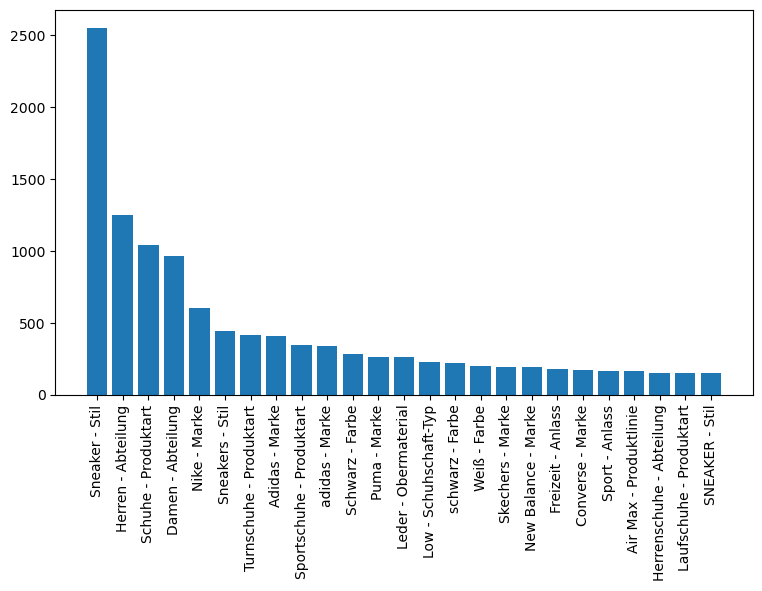

In [21]:
fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.bar(ent25.Token + " - " + ent25.Tag, ent25["Record Number"])
plt.xticks(ent25.Token + " - " + ent25.Tag, rotation=90)
plt.show()

Idea for a dummy model: when you see a word, classify it has the max count probability of the corresponding tags for that word.

Most frequent unigrams, bigrams, and trigrams

In [27]:
#most frequent unigrams, bigrams, and trigrams

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words="english")
unigrams = vectorizer.fit_transform(train_ner.Token)
unigram_counts = np.asarray(unigrams.sum(axis=0)).flatten()
unigram_counts = pd.Series(unigram_counts, index=vectorizer.get_feature_names_out()).sort_values(ascending=False)

#bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words="english")
bigrams = vectorizer.fit_transform(train_ner.Token)
bigram_counts = np.asarray(bigrams.sum(axis=0)).flatten()
bigram_counts = pd.Series(bigram_counts, index=vectorizer.get_feature_names_out()).sort_values(ascending=False)

#trigrams
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words="english")
trigrams = vectorizer.fit_transform(train_ner.Token)
trigram_counts = np.asarray(trigrams.sum(axis=0)).flatten()
trigram_counts = pd.Series(trigram_counts, index=vectorizer.get_feature_names_out()).sort_values(ascending=False)

print(unigram_counts.head(5))
print(bigram_counts.head(5))
print(trigram_counts.head(5))


sneaker       2790
schuhe        1656
herren        1480
damen         1231
turnschuhe     962
dtype: int64
new balance          211
air max              203
air jordan           117
turnschuhe schuhe     96
freizeit schuhe       86
dtype: int64
chuck taylor star       57
42 43 44                32
40 41 42                26
asics onitsuka tiger    24
38 39 40                24
dtype: int64


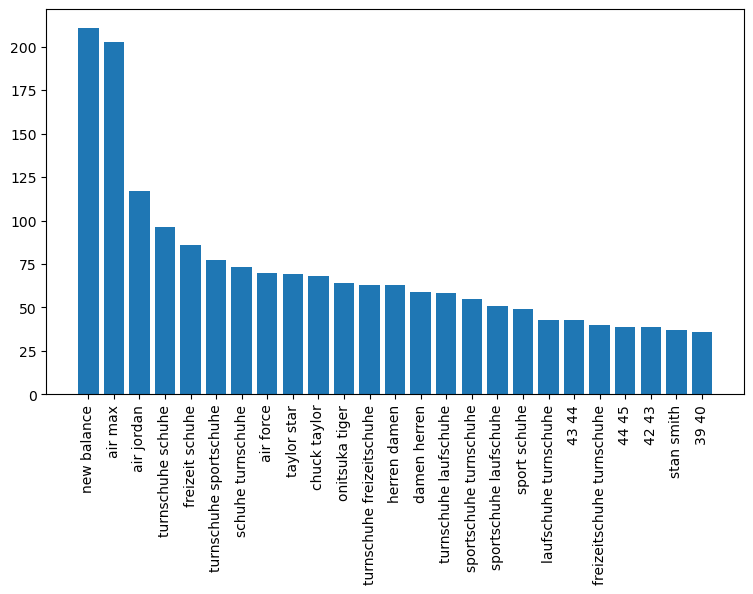

In [31]:
fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.bar(bigram_counts.index[0:25], bigram_counts.values[0:25])
plt.xticks(bigram_counts.index[0:25], rotation=90)
plt.show()

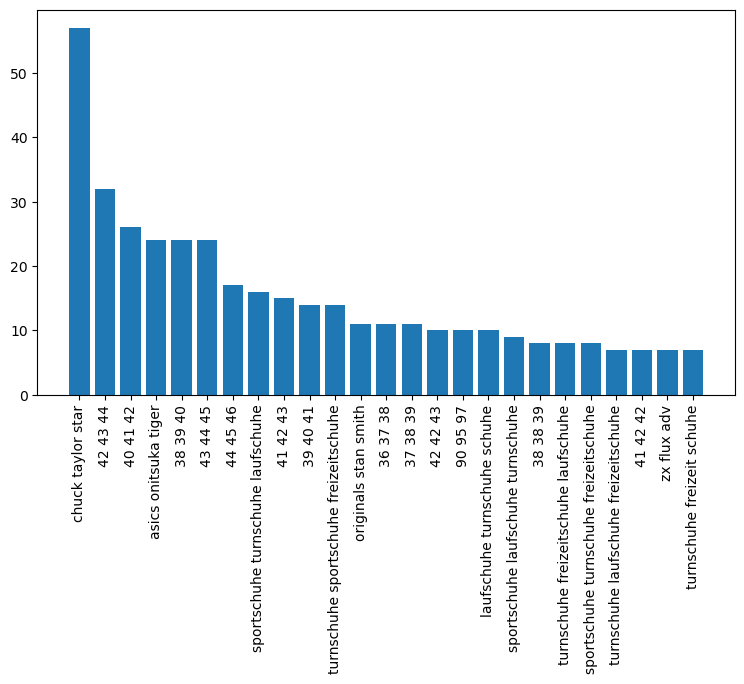

In [32]:
fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.bar(trigram_counts.index[0:25], trigram_counts.values[0:25])
plt.xticks(trigram_counts.index[0:25], rotation=90)
plt.show()

Analyzing the Titles

In [ ]:
titles = train_df.loc[:, ["Record Number", "Title"]].drop_duplicates().set_index("Record Number")
titles

In [ ]:
title_word_counts = np.sum(~titles.Title.str.split(" ", expand=True).isna(), axis=1)
title_word_counts.mean(), title_word_counts.std()

In [ ]:
longest_titles = pd.DataFrame(title_word_counts.sort_values(ascending=False)).reset_index().rename(columns={0:"Words"})
longest_titles = longest_titles.merge(titles.reset_index(), how="left")
longest_titles

In [ ]:
title_vcs = longest_titles.Words.value_counts()

fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.bar(title_vcs.index, title_vcs)
plt.xticks(title_vcs.index)
plt.show()

Pretty normally distributed sentence lengths around 11.